## **SVM analysis for imbalanced credit risk analysis**
(c) Henry Han 2016-2020

In [ ]:
import pandas as pd
import numpy as np


from sklearn.model_selection import cross_val_score
from sklearn import svm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.width',300, 'display.max_columns',500)
%matplotlib inline

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# go the the dest folder
dest_folder='/content/drive/My Drive/CISC5352'
os.chdir(dest_folder)
print('\n Current path: ' + os.getcwd())

Mounted at /content/drive

 Current path: /content/drive/My Drive/CISC5352


In [ ]:
credit = pd.read_csv('credit_data_NEW.csv')
credit

,WC/TA,RE/TAA,EBIT/TA,MVE/BVTD,S/TA,Industry
0,0.121,0.413,0.057,3.647,0.466,12
1,0.470,0.752,0.070,11.596,1.120,8
2,0.110,0.337,0.045,3.835,0.812,4
3,0.511,0.869,0.106,8.538,0.732,2
4,0.202,0.460,0.064,3.685,0.682,4
...,...,...,...,...,...,...
1665,-0.062,-0.707,0.034,0.107,0.197,11
1666,-0.866,-0.702,-0.110,1.109,0.359,12
1667,-0.147,-0.107,0.005,0.399,0.170,9
1668,-0.215,-0.993,-0.005,0.180,0.075,6


In [ ]:
credit['Type']=[1]*1540 + [0]*130
credit

,WC/TA,RE/TAA,EBIT/TA,MVE/BVTD,S/TA,Industry,Type
0,0.121,0.413,0.057,3.647,0.466,12,1
1,0.470,0.752,0.070,11.596,1.120,8,1
2,0.110,0.337,0.045,3.835,0.812,4,1
3,0.511,0.869,0.106,8.538,0.732,2,1
4,0.202,0.460,0.064,3.685,0.682,4,1
...,...,...,...,...,...,...,...
1665,-0.062,-0.707,0.034,0.107,0.197,11,0
1666,-0.866,-0.702,-0.110,1.109,0.359,12,0
1667,-0.147,-0.107,0.005,0.399,0.170,9,0
1668,-0.215,-0.993,-0.005,0.180,0.075,6,0


In [ ]:
credit.to_csv('credit_sim_data.csv')

In [ ]:
## biplot basic specificiation
## Method: generally speaking, it can be any dimension reduction method
##         such as 'pca', 'spca', 'tsne', 'umap'
def biplot(newData, label_1, label_2, label_1_name, label_2_name, Method):
    ##label 1
    plt.scatter(newData[label_1, 0], newData[label_1, 1], label=label_1_name,
                marker='o', color='hotpink', edgecolors='b', alpha=0.95, s=25)

    ## label 2
    plt.scatter(newData[label_2, 0], newData[label_2, 1], label=label_2_name,
                marker='o', color='r', edgecolors='g', alpha=0.95, s=22)
    
    plt.legend()

    ax=plt.gca()
    ax.legend(prop={'size': 10})
    if Method=='pca':
      plt.xlabel('$PC_{1}$', fontsize=10)
      plt.ylabel('$PC_{2}$', fontsize=10)
    elif Method=='spca':
      plt.xlabel('$SPC_{1}$', fontsize=10)
      plt.ylabel('$SPC_{2}$', fontsize=10)
    else:
      plt.xlabel('$'+ Method +'_{1}'+'$', fontsize=8)
      plt.ylabel('$'+ Method +'_{2}'+'$', fontsize=8)

In [ ]:
import umap
data=credit.copy()
umapNewData= umap.UMAP(n_neighbors=30,
                      min_dist=0.05,
                      metric='euclidean',
                      init='random').fit_transform(StandardScaler().fit_transform(data))

In [ ]:
# doPCA
# output is the new data in the PCA subspace (a ndarray)
def doPCA (data):
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data)
    
    pca=PCA()
    newPCAData=pca.fit_transform(normalized_data)
    return newPCAData

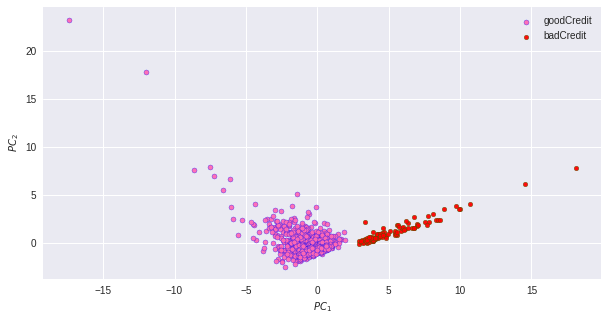

In [ ]:
pcaNewData=doPCA(data)
plt.style.use('seaborn')
fig_pca=plt.figure(figsize=(10, 5))
biplot(pcaNewData, goodCredit, badCredit, 'goodCredit', 'badCredit', 'pca')


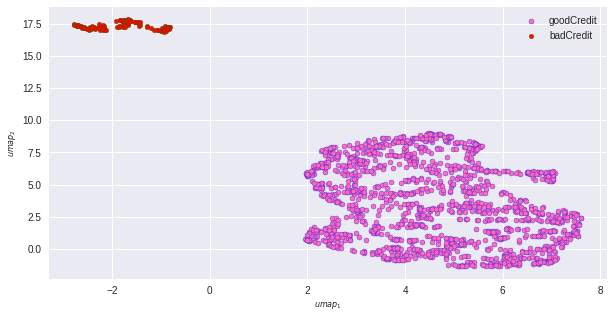

In [ ]:
fig_umap=plt.figure(figsize=(10, 5))

goodCredit =  data['Type'] == 1
badCredit = data['Type'] == 0
plt.style.use('seaborn')
biplot(umapNewData, goodCredit, badCredit, 'goodCredit', 'badCredit', 'umap')


In [ ]:
from sklearn.manifold import TSNE
# do t-SNE to get new data in the TSNE space 
def doTSNE (data, perplexity, init):

  normalized_data=StandardScaler().fit_transform(data)
  tsne = TSNE(perplexity=perplexity, init=init)
  newData = tsne.fit_transform(normalized_data)

  return newData

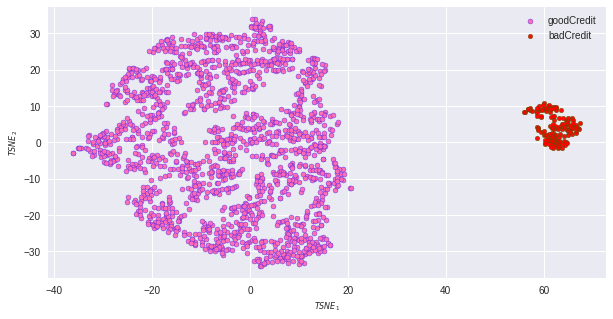

In [ ]:
# do biplot for tSNE
tsneNewData=doTSNE(data,50, 'pca')
fig_tsne=plt.figure(figsize=(10, 5))
plt.style.use('seaborn')
biplot(tsneNewData,  goodCredit, badCredit, 'goodCredit', 'badCredit', 'TSNE')

In [ ]:
# specifiy the basic SVM models

svm_models = (svm.SVC(kernel='linear'), 
          svm.SVC(kernel='rbf'), 
          svm.SVC(kernel='poly'), 
          svm.SVC(kernel='sigmoid'))

In [ ]:
  normalized_data=StandardScaler().fit_transform(data.iloc[:, 0:6])
  data_label_=data["Type"]


In [ ]:
k=5 # total folders
print("\n k={:d}".format(k) + " fold cross validation\n")

for clf in svm_models:
    scores = cross_val_score(clf, normalized_data, data_label_, cv=k)
    
    print("\nSVM classification under kernel ** " + str(clf.kernel) +
         " ** is:\n" + str(scores))
    print("The mean score under kernel ** " + str(clf.kernel) +
         " ** is:\t" + str(np.mean(scores)))




 k=5 fold cross validation


SVM classification under kernel ** linear ** is:
[1.         1.         1.         0.99401198 1.        ]
The mean score under kernel ** linear ** is:	0.9988023952095808

SVM classification under kernel ** rbf ** is:
[0.99700599 1.         1.         0.99700599 0.99700599]
The mean score under kernel ** rbf ** is:	0.9982035928143713

SVM classification under kernel ** poly ** is:
[1.         1.         0.99700599 0.99700599 1.        ]
The mean score under kernel ** poly ** is:	0.9988023952095808

SVM classification under kernel ** sigmoid ** is:
[0.9491018  0.94311377 0.95808383 0.92215569 0.89221557]
The mean score under kernel ** sigmoid ** is:	0.932934131736527
